In [1]:
import json
import random
from pathlib import Path

import pandas as pd
import seaborn as sns
import spacy
import textacy
from spacy.lang.en import English
from tqdm.notebook import tqdm

sns.set_theme()


%load_ext autoreload
%autoreload 2
Path.ls = lambda x: list(x.iterdir())

In [2]:
data_dir = Path("../data").resolve()
assert data_dir.exists()
data_dir.ls()

[PosixPath('/home/nirant/AppReview/data/Clubhouse_us_app_store_reviews.json'),
 PosixPath('/home/nirant/AppReview/data/frequency_count.json'),
 PosixPath('/home/nirant/AppReview/data/Moj_us_app_store_reviews.json'),
 PosixPath('/home/nirant/AppReview/data/Uber_us_app_store_reviews.json'),
 PosixPath('/home/nirant/AppReview/data/com.ubercab_us_play_store_reviews.json'),
 PosixPath('/home/nirant/AppReview/data/Netflix_us_app_store_reviews.json'),
 PosixPath('/home/nirant/AppReview/data/Moj_in_app_store_reviews.json'),
 PosixPath('/home/nirant/AppReview/data/IndiaGold_in_app_store_reviews.json')]

Note:

Here we will explore App Reviews for just one app: Uber (Passenger/Cab, not the Driver). The additional data to reproduce this for other clients is left as an exercise for you.

But to get an overview of all of them, we combine them into a larger single text string and explore them. 

In [3]:
file_path = data_dir / "Uber_us_app_store_reviews.json"; assert file_path.exists()
with file_path.open("r") as f:
    raw_data = pd.read_json(f)
    reviews = raw_data["review"].to_list()
# print(type(reviews), reviews)

In [4]:
len(reviews)

1000

In [5]:
reviews = []
files = [x for x in data_dir.ls() if "app" in x.name]
for file_path in files:
    try:
        with file_path.open("r") as f:
            file_data = pd.read_json(f)
            reviews += file_data["review"].to_list()
    except ValueError as e:
        print(f"Value Error with {file.name}")
    except KeyError as ke:
        print(f"Key error with {file.name}")

In [6]:
# !python -m spacy download en_core_web_sm

In [7]:
%time reviews = [rev.strip() for rev in reviews]
len(reviews)

CPU times: user 1.1 ms, sys: 749 µs, total: 1.85 ms
Wall time: 1.87 ms


6049

In [8]:
%time corpus = textacy.Corpus("en_core_web_sm", data=reviews)

CPU times: user 1min, sys: 9.74 s, total: 1min 10s
Wall time: 1min 10s


In [9]:
corpus.n_docs, corpus.n_sents, corpus.n_tokens

(6049, 35560, 592458)

In [10]:
word_counts = corpus.word_counts(by="lemma_", filter_stops= True, filter_nums=True, filter_punct=True)
most_common_lemmas = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:25]
most_common_lemmas

[('app', 4563),
 ('Netflix', 3396),
 ('watch', 3072),
 ('like', 2768),
 ('show', 2420),
 ('movie', 2409),
 ('driver', 2374),
 ('Uber', 2337),
 ('time', 2283),
 ('love', 1814),
 ('people', 1382),
 ('ride', 1369),
 ('good', 1361),
 ('want', 1352),
 ('know', 1257),
 ('go', 1135),
 ('try', 1117),
 ('great', 1098),
 ('use', 1094),
 ('need', 1077),
 ('thing', 1067),
 ('say', 1020),
 ('get', 1019),
 ('work', 1014),
 ('way', 989)]

In [11]:
df = pd.DataFrame(most_common_lemmas, columns=["words", "count"])

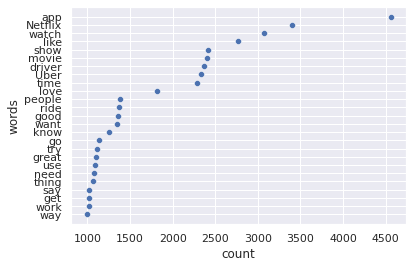

In [12]:
plot = sns.scatterplot(data=df, x="count", y="words")